<a href="https://colab.research.google.com/github/shinobi3610/unsupervisde-learning/blob/main/Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [9]:
# load file data
pd.set_option("display.max_colwidth",180)
df = pd.read_csv('/content/drive/MyDrive/ML_DHBKHN/week2/data/Country-data.csv')
data_dict = pd.read_csv('/content/drive/MyDrive/ML_DHBKHN/week2/data/Country-data.csv')

In [10]:
data_dict

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.shape


(167, 10)

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

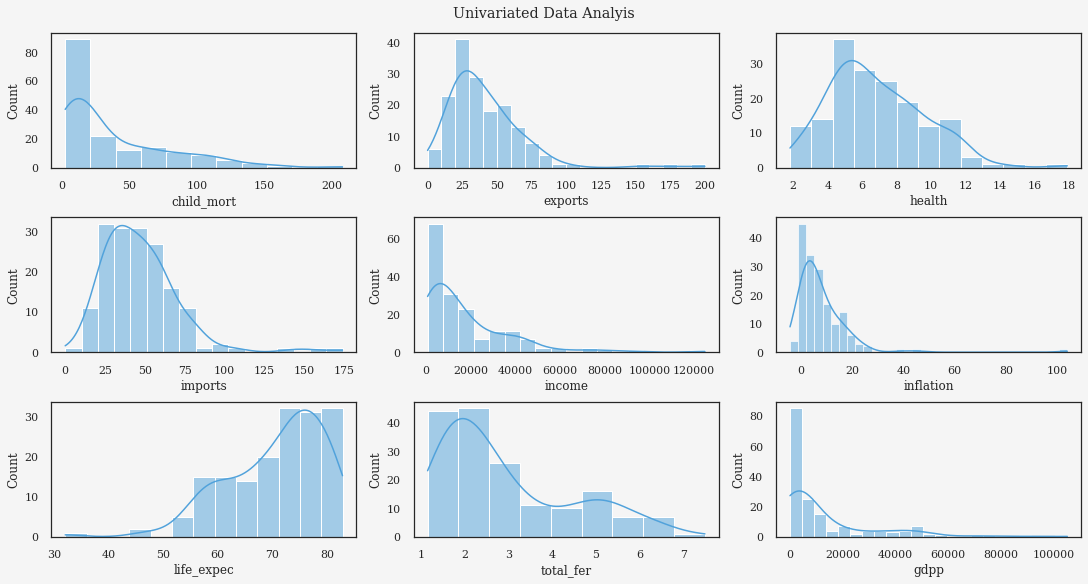

In [12]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True, color=colors[2])

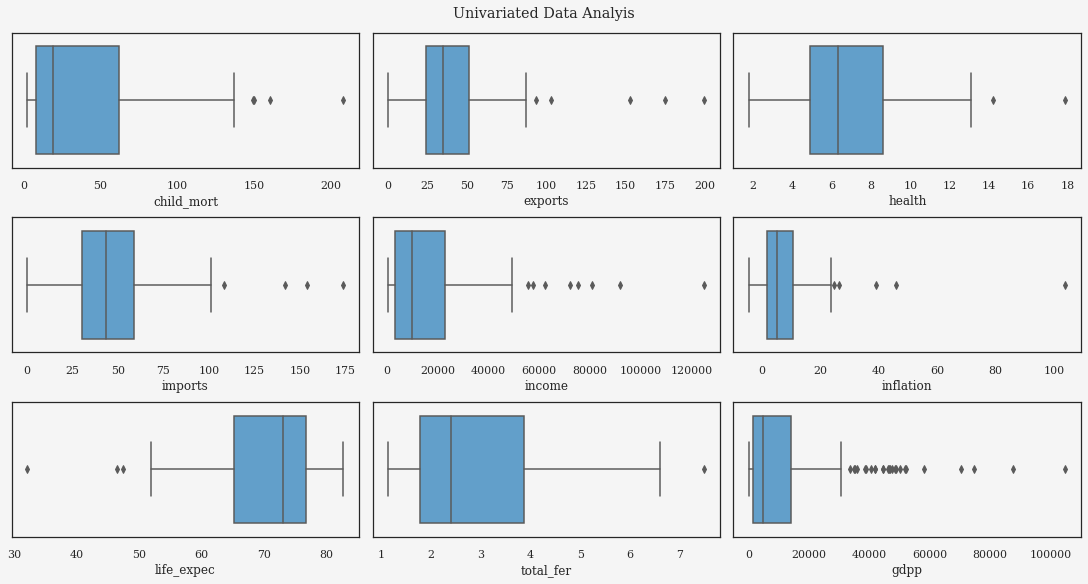

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color=colors[2])

In [ ]:
px.scatter(data_frame=df, x='exports', y='imports',size='gdpp', text='country', color='gdpp', title='Countries by Export & Import and corresponding GDP')

In [14]:
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names', locations='country', color=i, title=f'{i} rate by countries')
    fig.show()

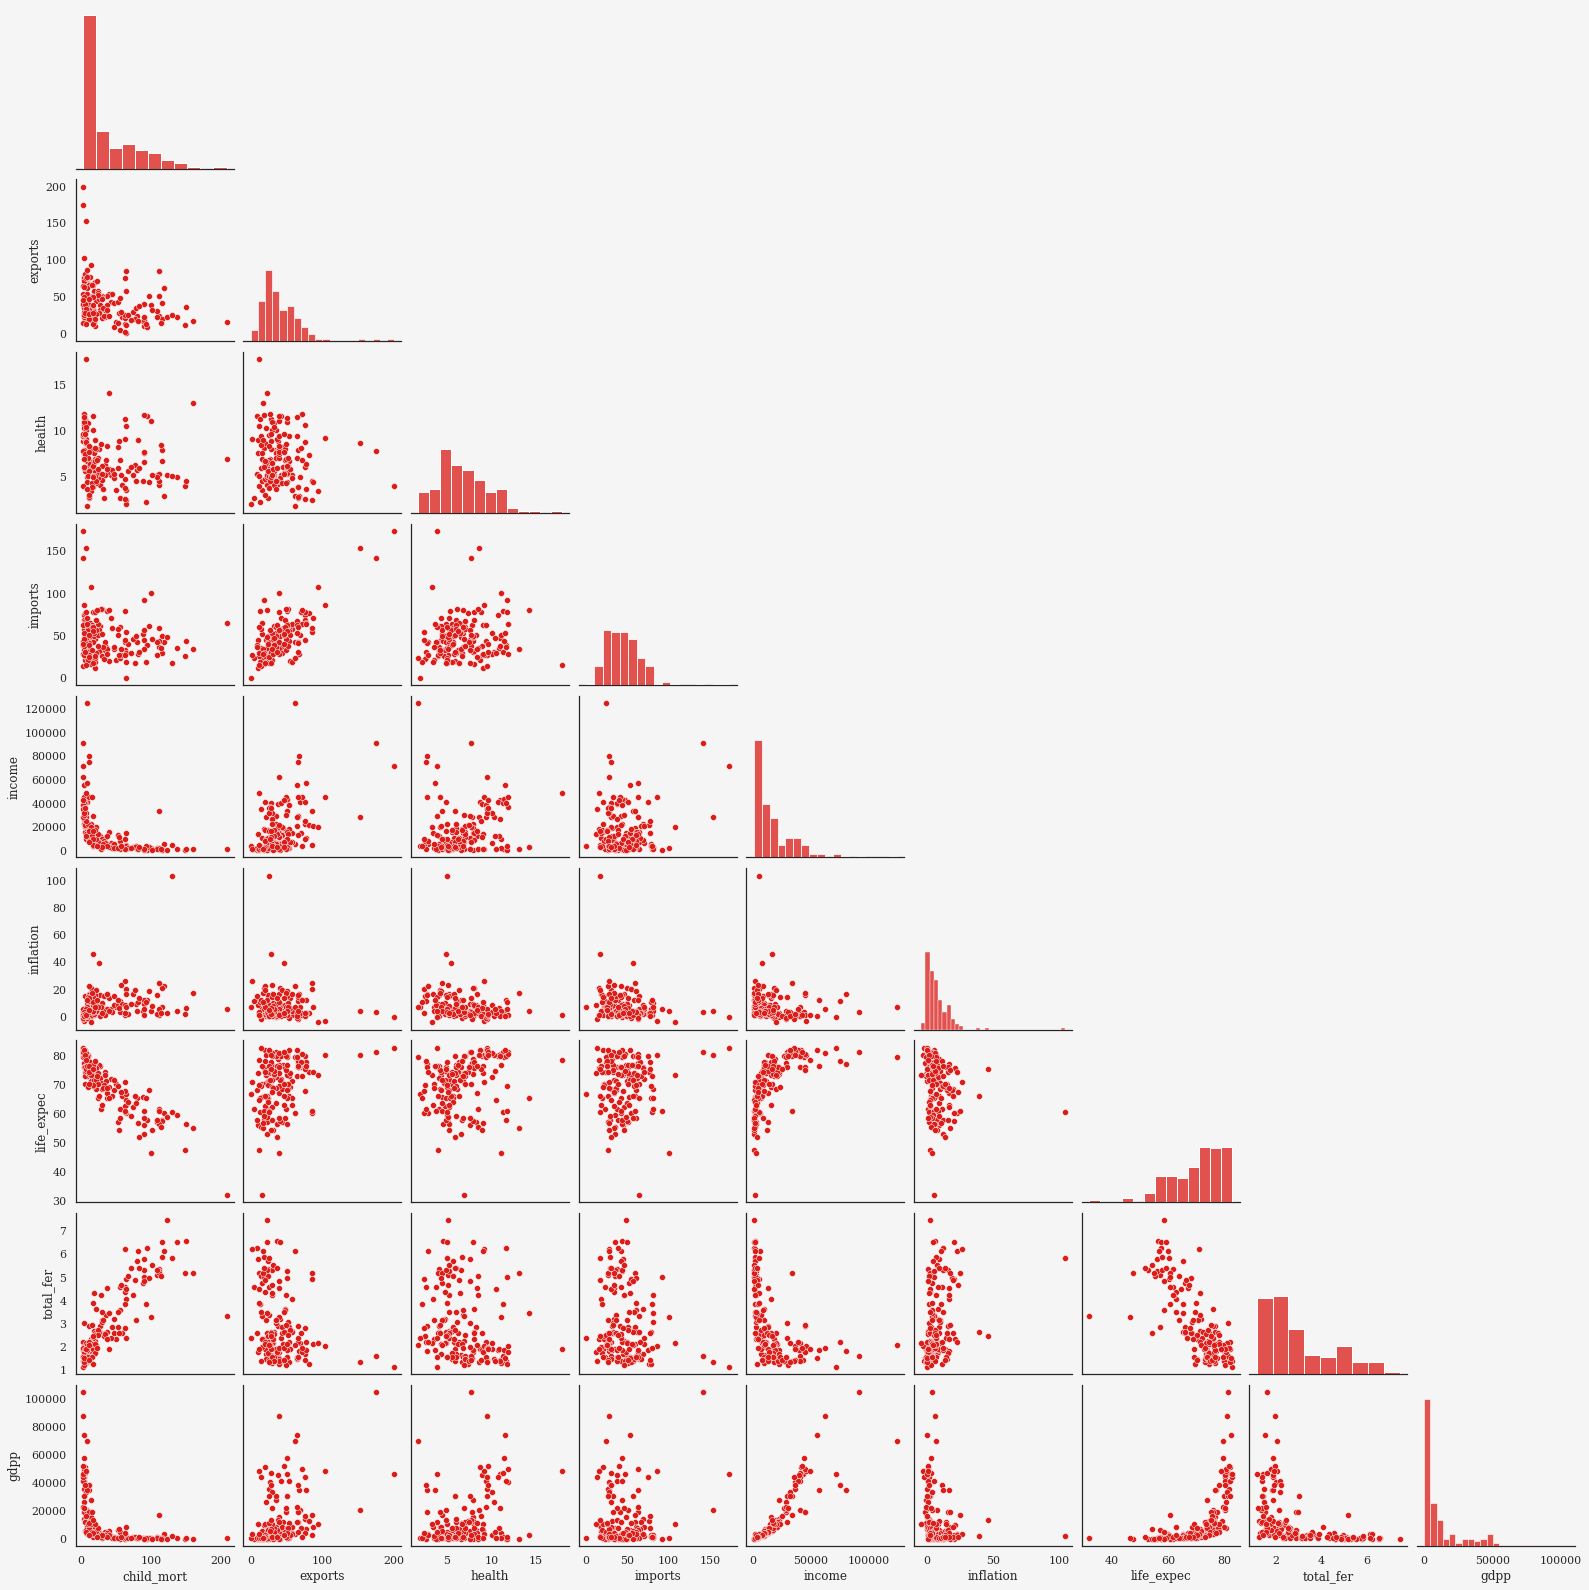

In [ ]:
sns.pairplot(df, corner =True)

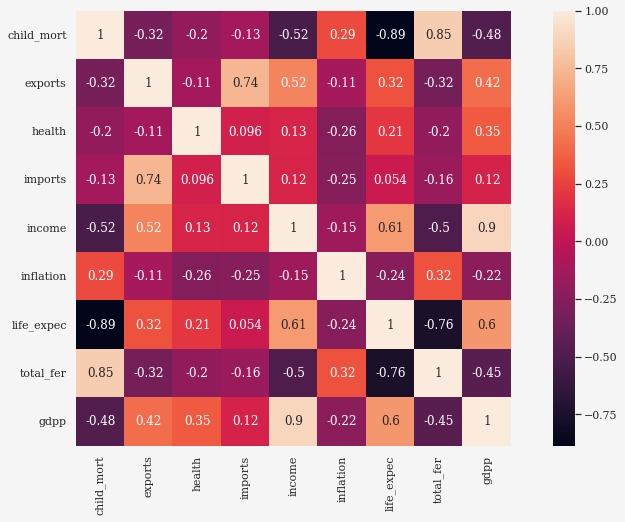

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, square=True)

In [15]:
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df.drop(['country'], axis=1))
from sklearn.decomposition import PCA
decom = PCA(svd_solver='auto')
decom.fit(df_scaled)

PCA()

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


Text(0, 0.5, 'explaned variance ratio')

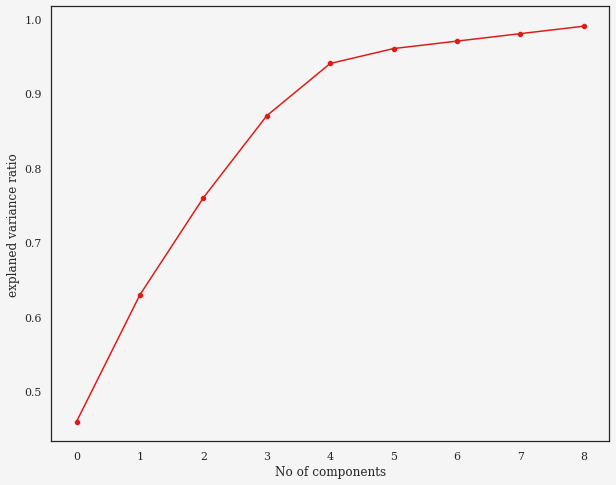

In [ ]:
cum_exp_ratio = np.cumsum(np.round(decom.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

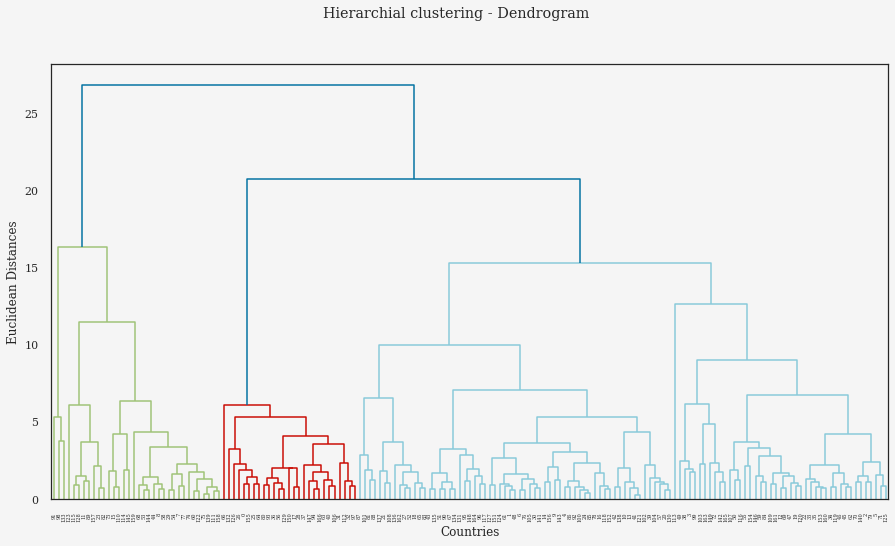

In [16]:
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

K-mean Clustering

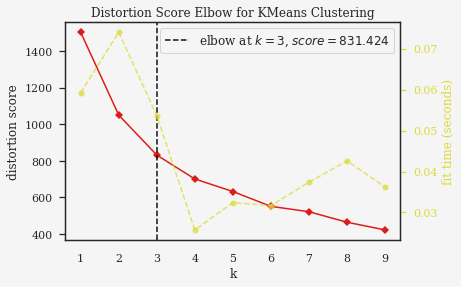

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_scaled)
visualize.poof()

Elbow method is common method used to validate the clustering algorithm. here we can see the K value 3 with relatively good distortion score.

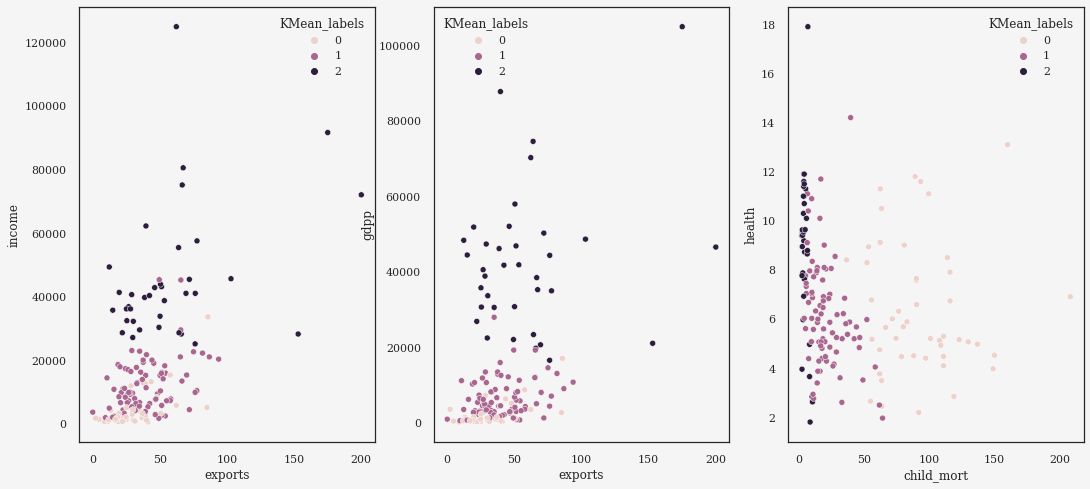

In [18]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaled)
df['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=df, x='exports', y='income', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=df, x='exports', y='gdpp', hue='KMean_labels', ax=ax[1])
sns.scatterplot(data=df, x='child_mort', y='health', hue='KMean_labels', ax=ax[2])

In [19]:
df.groupby(['KMean_labels','country']).mean()

child_mort  exports  health  imports  \
KMean_labels country                                                      
0            Afghanistan                 90.2     10.0    7.58     44.9   
             Angola                     119.0     62.3    2.85     42.9   
             Benin                      111.0     23.8    4.10     37.2   
             Botswana                    52.5     43.6    8.30     51.3   
             Burkina Faso               116.0     19.2    6.74     29.6   
...                                       ...      ...     ...      ...   
2            Sweden                       3.0     46.2    9.63     40.7   
             Switzerland                  4.5     64.0   11.50     53.3   
             United Arab Emirates         8.6     77.7    3.66     63.6   
             United Kingdom               5.2     28.2    9.64     30.8   
             United States                7.3     12.4   17.90     15.8   

                                    income  inflation  life_expec  total_fer  \
KMean_labels country                                                           
0            Afghanistan            1610.0      9.440        56.2       5.82   
             Angola                 5900.0     22.400        60.1       6.16   
             Benin                  1820.0      0.885        61.8       5.36   
             Botswana              13300.0      8.920        57.1       2.88   
             Burkina Faso           1430.0      6.810        57.9       5.87   
...                                    ...        ...         ...        ...   
2            Sweden                42900.0      0.991        81.5       1.98   
             Switzerland           55500.0      0.317        82.2       1.52   
             United Arab Emirates  57600.0     12.500        76.5       1.87   
             United Kingdom        36200.0      1.570        80.3       1.92   
             United States         49400.0      1.220        78.7       1.93   

                                      gdpp  
KMean_labels country                        
0            Afghanistan             553.0  
             Angola                 3530.0  
             Benin                   758.0  
             Botswana               6350.0  
             Burkina Faso            575.0  
...                                    ...  
2            Sweden                52100.0  
             Switzerland           74600.0  
             United Arab Emirates  35000.0  
             United Kingdom        38900.0  
             United States         48400.0  

[167 rows x 9 columns]

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,labels=model.labels_)

0.28329575683463126

In [21]:
#df['KMean_labels']=df['KMean_labels'].astype('category')
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
df['KMean_labels']=df['KMean_labels'].map(cat)

px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular')

In [22]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='African Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='africa')

In [23]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Asian Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='asia')

In [24]:
df[df['KMean_labels']=='Need Help']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [25]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Need Help
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Might need help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Might need help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Need Help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might need help
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Might need help
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Might need help
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Might need help
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Need Help


In [26]:
count_data = df[['child_mort', 'imports', 'gdpp']]

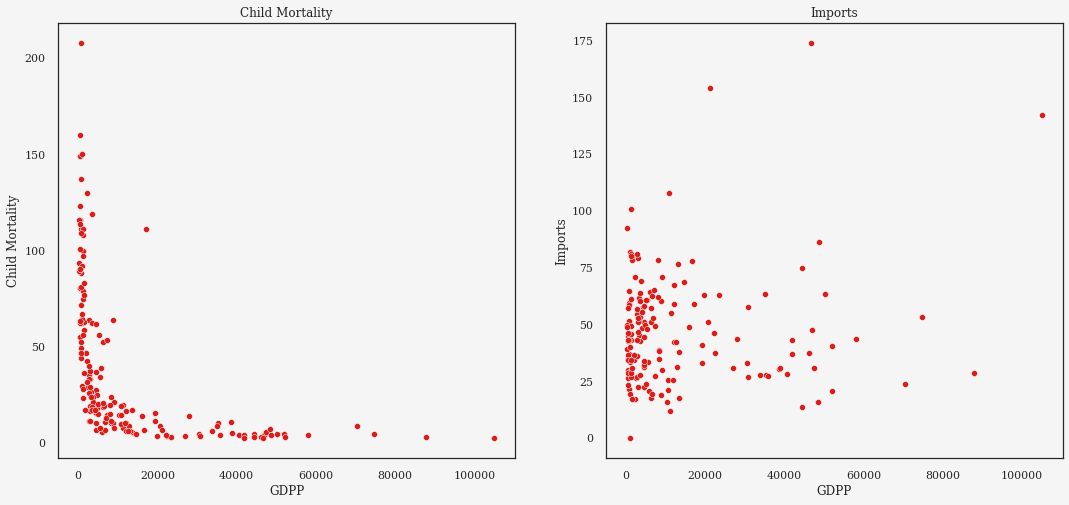

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [28]:
#Kmean, try each k cluster. evaluate distorsion
number_of_cluster = range(1,11)
clusterings = [KMeans(n_clusters = k).fit(count_data) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

D_k = [cdist(count_data, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis = 1) for D in D_k] 
dist = [np.min(D, axis = 1) for D in D_k] 
avg_withinSS = [sum(d)/count_data.shape[0] for d in dist] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



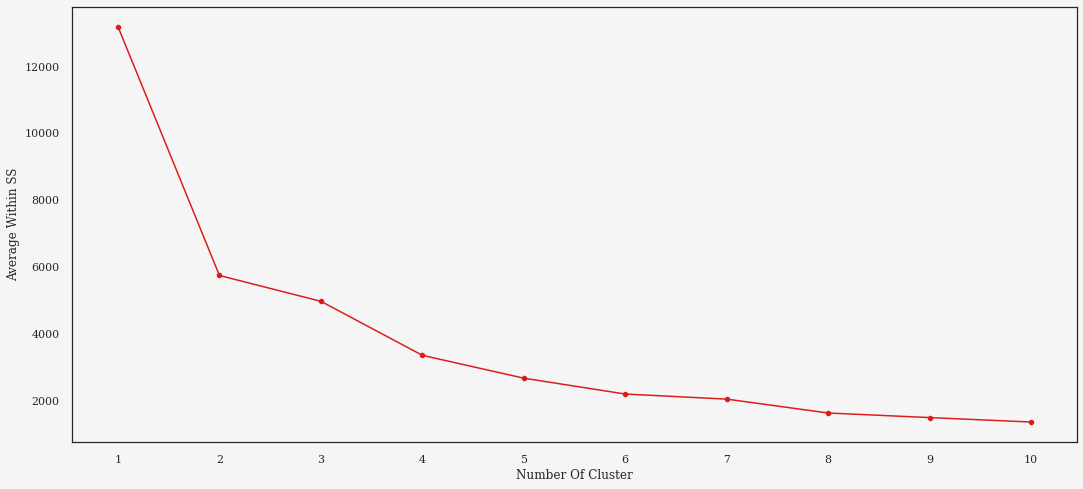

In [29]:
plt.figure(figsize=(18,8))
sns.lineplot(number_of_cluster, avg_withinSS)
sns.scatterplot(number_of_cluster, avg_withinSS)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within SS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(count_data)
country_clust = count_data.copy()
country_clust['clustkmeans'] = kmeans.labels_

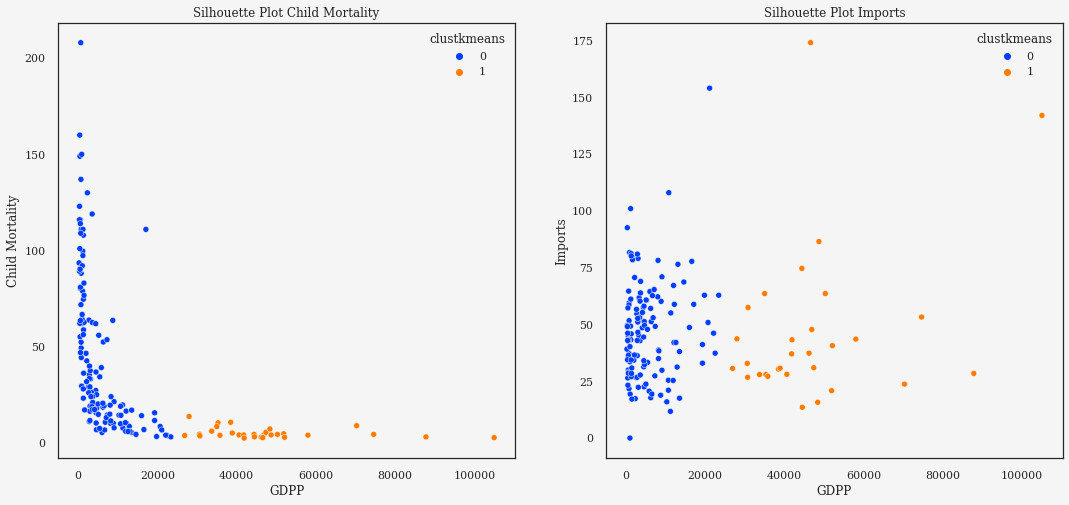

In [31]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustkmeans', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [32]:
cluster_name = ['Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange']
mortality = ['Low GDPP VS Low to Medium Child Mortality', 'Medium GDPP VS Low Child Mortality']
imports = ['Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
best_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
best_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster 0,Low GDPP VS Low to Medium Child Mortality,Low GDPP VS Medium Imports
1,Orange,Cluster 1,Medium GDPP VS Low Child Mortality,Medium GDPP VS Medium Imports


In [33]:
scaler = StandardScaler()
country_clust_scaled = scaler.fit_transform(country_clust)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(country_clust_scaled)
        score = silhouette_score(country_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 7
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.2393615335452477

eps 0.2
\min samples 8
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.2393615335452477

eps 0.3
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [119  30  11   7]
Silhouette Score: -0.1695682589970686

eps 0.3
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [130  29   8]
Silhouette Score: -0.15138644771886964

eps 0.4
\min samples 7
clusters present: [-1  0  1]
clusters sizes: [ 53 101  13]
Silhouette Score: 0.2581064152198133

eps 0.4
\min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [70 78 11  8]
Silhouette Score: 0.11859148004718649


In [34]:
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(country_clust_scaled)
country_clust['clustdbscan'] = labels

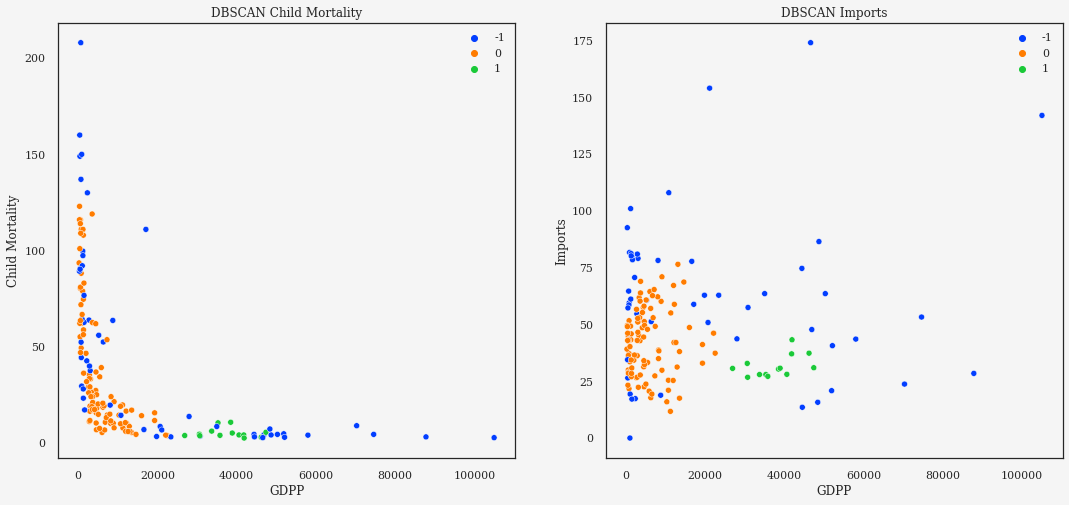

In [35]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [36]:
cluster_name = ['Cluster -1', 'Cluster 0', 'Cluster 1']
color = ['Blue', 'Orange', 'Green']
mortality = ['Noise', 'Low GDPP VS Low to Medium Imports', 'Medium GDPP VS Low Imports']
imports = ['Noise', 'Low GDPP VS Medium Imports', 'Medium GDPP VS Medium Imports']
dbscan_summary = pd.DataFrame({'Color': color, 'Name': cluster_name,
                        'Child Mortality': mortality, 'Imports': imports})
dbscan_summary

,Color,Name,Child Mortality,Imports
0,Blue,Cluster -1,Noise,Noise
1,Orange,Cluster 0,Low GDPP VS Low to Medium Imports,Low GDPP VS Medium Imports
2,Green,Cluster 1,Medium GDPP VS Low Imports,Medium GDPP VS Medium Imports
